<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [3]:
## Write your code here
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64

In [4]:
df['ConvertedCompYearly']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
65432   NaN
65433   NaN
65434   NaN
65435   NaN
65436   NaN
Name: ConvertedCompYearly, Length: 65437, dtype: float64

/tmp/ipykernel_2876/1848140149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedCompYearly'], kde=True)


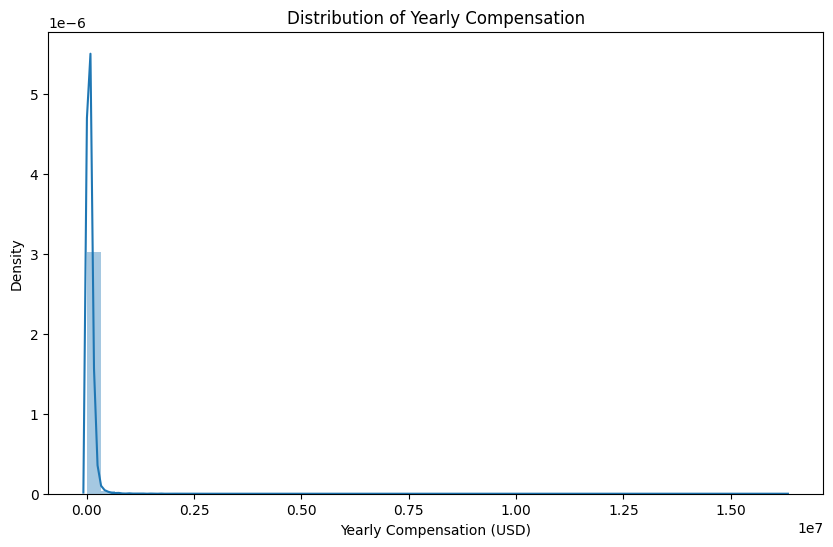

In [5]:
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedCompYearly'], kde=True)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Density')
plt.show()

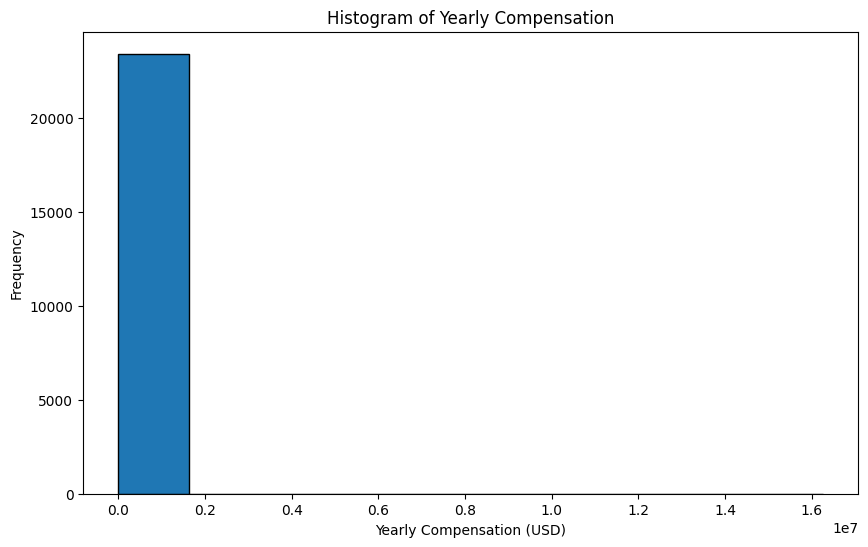

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [9]:
## Write your code here
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [10]:
df['Employment']

0        Employed, full-time
1        Employed, full-time
2        Employed, full-time
3         Student, full-time
4         Student, full-time
                ...         
65432    Employed, full-time
65433    Employed, full-time
65434    Employed, full-time
65435    Employed, full-time
65436     Student, full-time
Name: Employment, Length: 65437, dtype: object

In [12]:
df_full_time = df[df['Employment'] == 'Employed, full-time']
df_full_time

In [23]:
median_compensation = df_full_time['ConvertedCompYearly'].median(numeric_only=True)
median_compensation

np.float64(69814.0)

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [24]:
## Write your code here
df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

In [25]:
df['Country']

0                                 United States of America
1        United Kingdom of Great Britain and Northern I...
2        United Kingdom of Great Britain and Northern I...
3                                                   Canada
4                                                   Norway
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435                                              Germany
65436                                                  NaN
Name: Country, Length: 65437, dtype: object

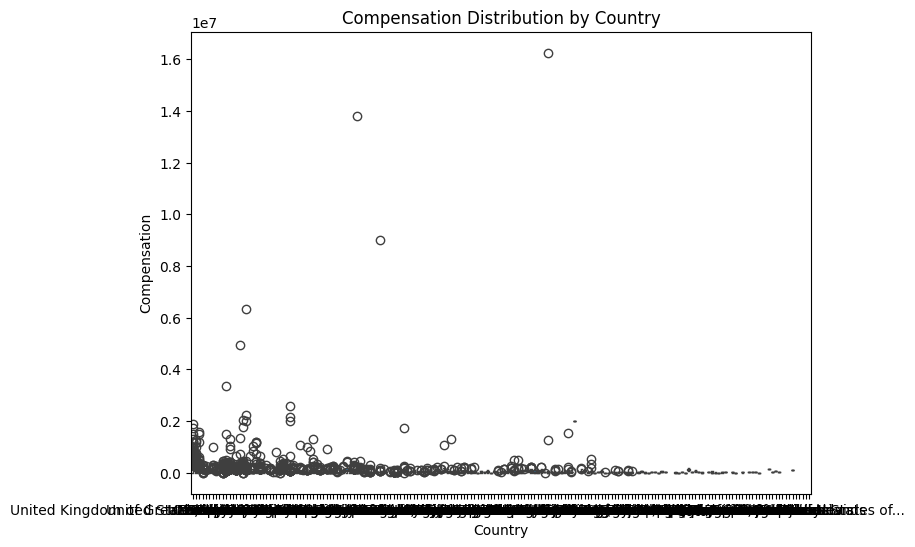

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df)
plt.title('Compensation Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Compensation')
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [28]:
## Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(75259.5)

In [29]:
upper_bound = Q3 + 1.5 * IQR
upper_bound 

np.float64(220860.75)

In [30]:
lower_bound = Q1 - 1.5 * IQR
lower_bound

np.float64(-80177.25)

In [31]:
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
df_no_outliers

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41179,41180,I am a developer by profession,25-34 years old,"Employed, full-time;Employed, part-time",Remote,Apples,Contribute to open-source projects;Bootstrappi...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Stack Overflow;Coding ...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,15600.0,NaN
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,20.0,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [32]:
## Write your code here
df['WorkExp'].value_counts()

WorkExp
3.0     2144
5.0     2050
10.0    2029
2.0     1885
4.0     1767
6.0     1600
7.0     1581
8.0     1554
1.0     1461
15.0    1250
12.0    1249
20.0    1074
9.0      982
11.0     823
25.0     794
13.0     740
14.0     655
16.0     600
17.0     596
18.0     587
30.0     461
24.0     382
19.0     330
22.0     323
23.0     269
26.0     254
21.0     251
27.0     217
35.0     217
28.0     210
0.0      192
40.0     139
29.0     117
32.0     101
33.0      90
36.0      89
34.0      84
31.0      83
37.0      60
38.0      55
50.0      53
42.0      47
45.0      46
39.0      37
41.0      36
43.0      34
44.0      32
46.0      12
48.0       7
47.0       5
49.0       4
Name: count, dtype: int64

In [33]:
df['WorkExp']

0         NaN
1        17.0
2         NaN
3         NaN
4         NaN
         ... 
65432     NaN
65433     NaN
65434     NaN
65435     5.0
65436     NaN
Name: WorkExp, Length: 65437, dtype: float64

In [34]:
df['JobSatPoints_1'].value_counts()

JobSatPoints_1
0.0     11271
10.0     4010
20.0     2909
5.0      1496
30.0     1309
        ...  
47.0        1
83.0        1
43.0        1
7.5         1
36.0        1
Name: count, Length: 91, dtype: int64

In [35]:
df['JobSatPoints_1']

0        NaN
1        0.0
2        NaN
3        NaN
4        NaN
        ... 
65432    NaN
65433    NaN
65434    NaN
65435    0.0
65436    NaN
Name: JobSatPoints_1, Length: 65437, dtype: float64

In [36]:
df_subset = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]
df_subset

,ConvertedCompYearly,WorkExp,JobSatPoints_1
0,NaN,NaN,NaN
1,NaN,17.0,0.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
65432,NaN,NaN,NaN
65433,NaN,NaN,NaN
65434,NaN,NaN,NaN
65435,NaN,5.0,0.0


In [37]:
corr_matrix = df_subset.corr()
corr_matrix

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.154114,0.020306
WorkExp,0.154114,1.000000,-0.026490
JobSatPoints_1,0.020306,-0.026490,1.000000


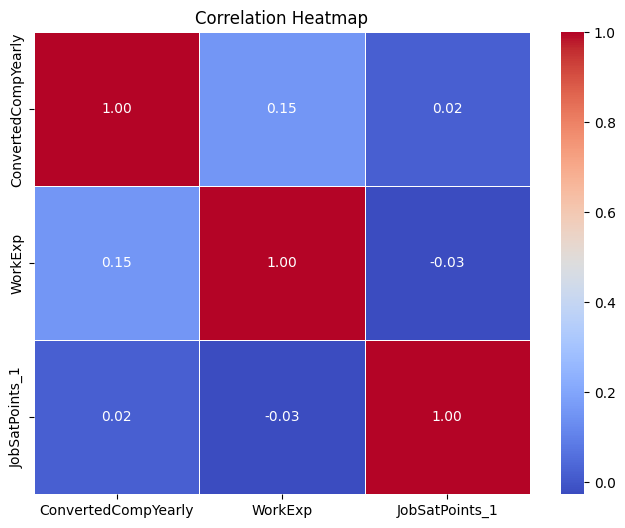

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


Text(0, 0.5, 'Converted Compensation Yearly (ConvertedCompYearly)')

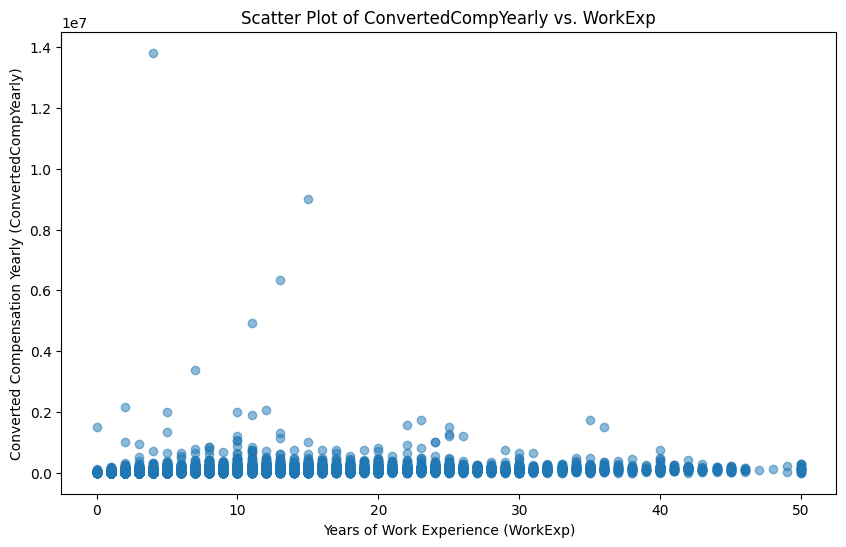

In [39]:
## Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(df['WorkExp'], df['ConvertedCompYearly'], alpha=0.5)  
plt.title('Scatter Plot of ConvertedCompYearly vs. WorkExp')
plt.xlabel('Years of Work Experience (WorkExp)')
plt.ylabel('Converted Compensation Yearly (ConvertedCompYearly)')

Text(0, 0.5, 'Converted Compensation Yearly (ConvertedCompYearly)')

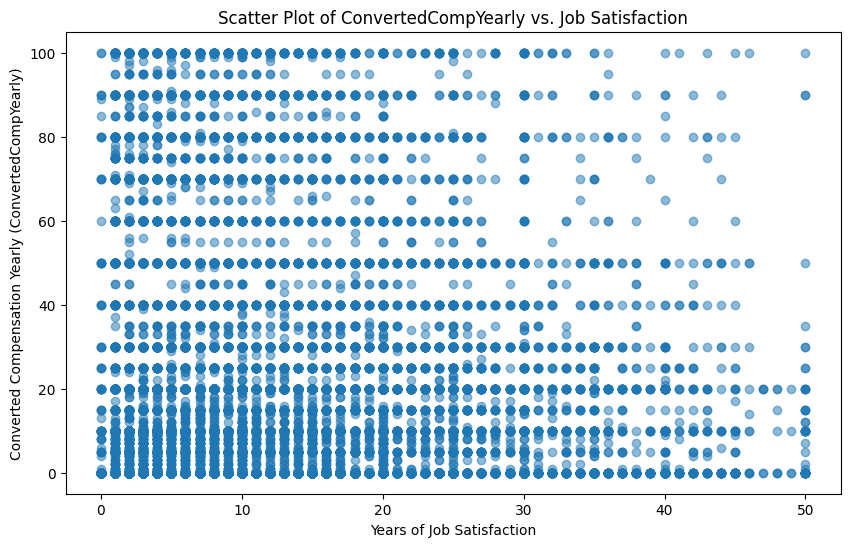

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WorkExp'], df['JobSatPoints_1'], alpha=0.5)  
plt.title('Scatter Plot of ConvertedCompYearly vs. Job Satisfaction')
plt.xlabel('Years of Job Satisfaction')
plt.ylabel('Converted Compensation Yearly (ConvertedCompYearly)')

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
